# Problem Set 2

## FINM 37301 - 2023

### UChicago Financial Mathematics

* Aman Krishna

In [52]:
import pandas as pd
import numpy as np
import math
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

from scipy.optimize import fsolve

pd.options.display.float_format = '{:.4f}'.format

from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)

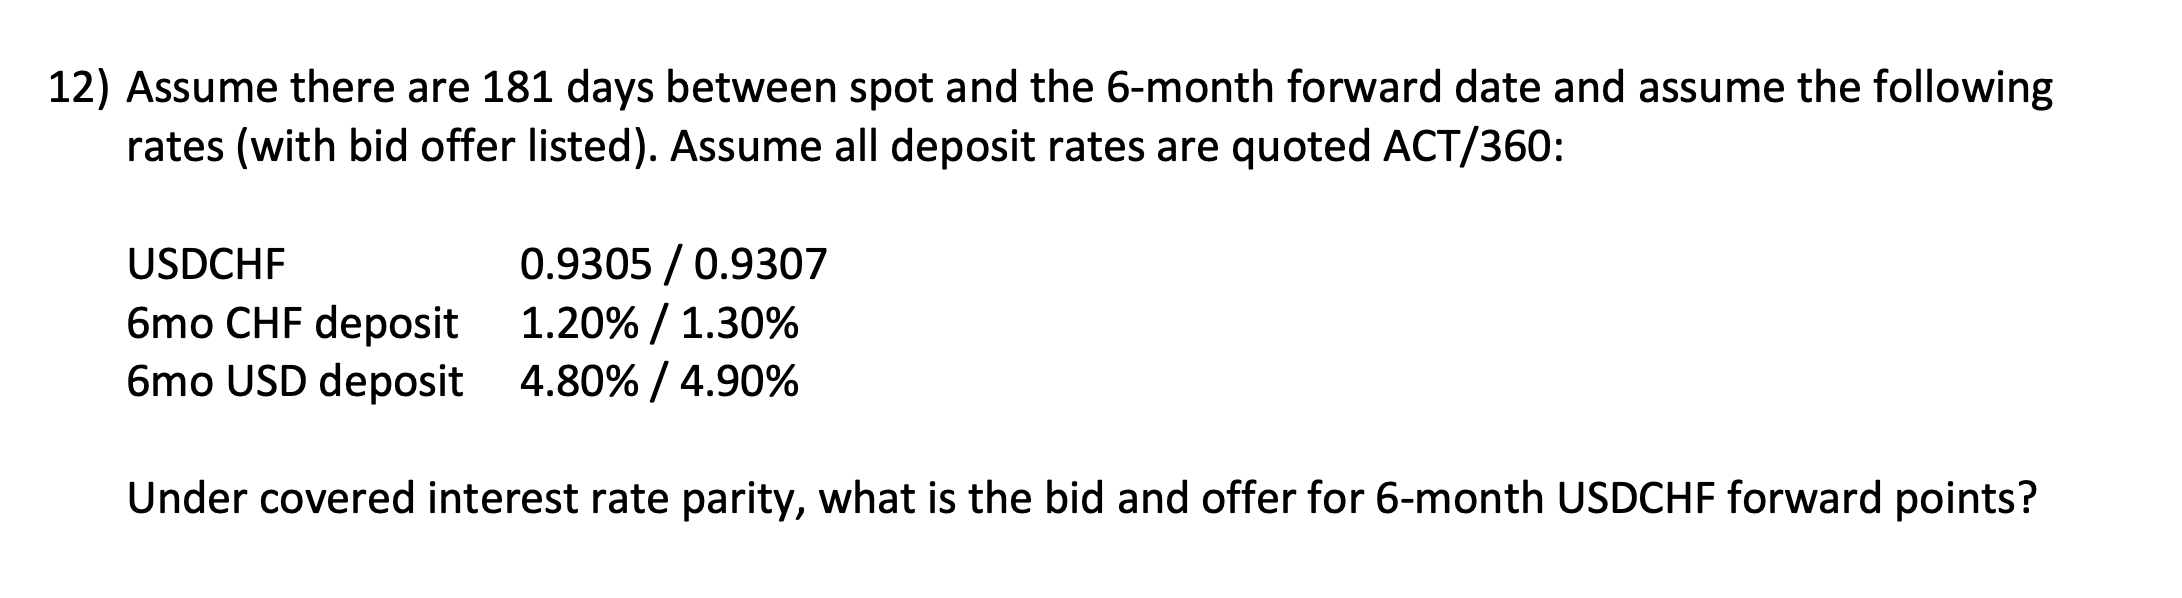

In [53]:
USDCHF_spot_bid = 0.9305
USDCHF_spot_offer = 0.9307
USD_6month_bid = 0.048
USD_6month_offer = 0.049
CHF_6month_bid = 0.012
CHF_6month_offer = 0.013

#### **Offer** 6-month USD CHF forward points

In [54]:
USDCHF_forward_offer = (USDCHF_spot_bid*(1+CHF_6month_offer*181/360)/(1+USD_6month_bid*181/360) - USDCHF_spot_bid)*10000
printmd(f'**USDCHF forward offer =** {USDCHF_forward_offer:.4f}')

**USDCHF forward offer =** -159.8836

#### **Bid** 6-month USD CHF forward points

In [55]:
USDCHF_forward_bid = (USDCHF_spot_offer*(1+CHF_6month_bid*181/360)/(1+USD_6month_offer*181/360) - USDCHF_spot_offer)*10000
printmd(f'**USDCHF forward bid =** {USDCHF_forward_bid:.4f}')

**USDCHF forward bid =** -168.9732

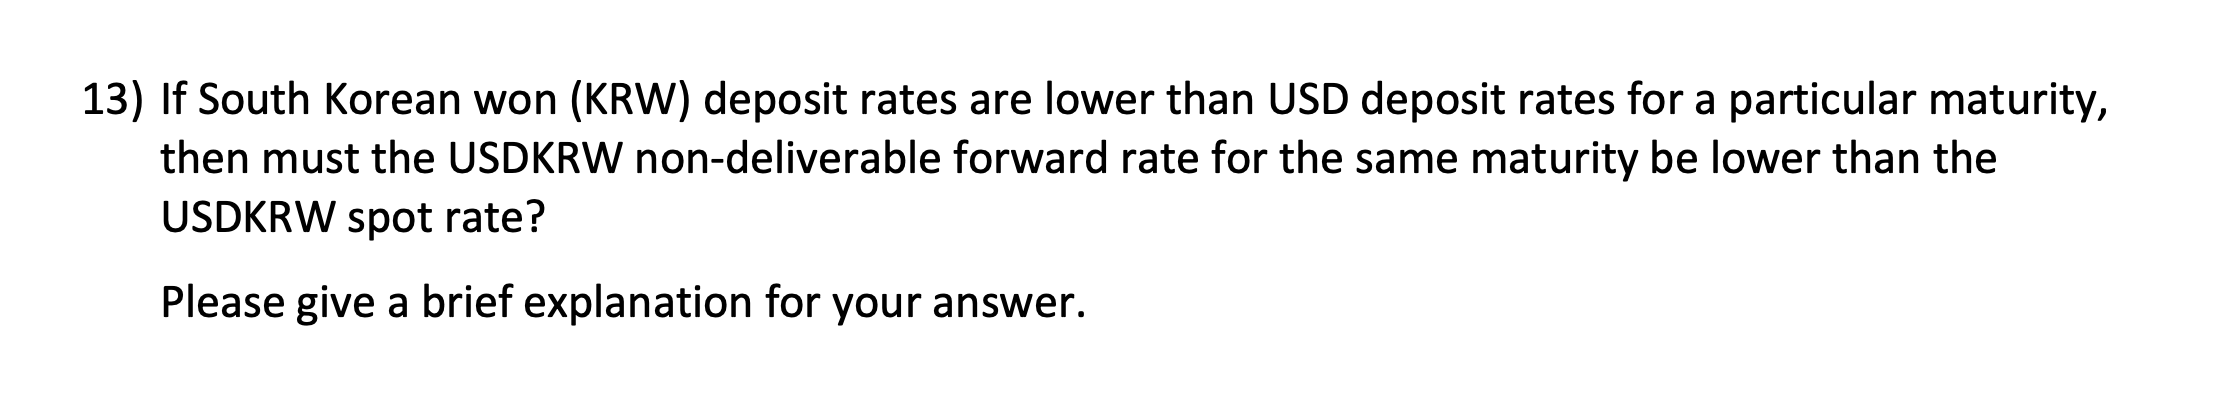

Not necessarily. The relationship between deposit rates and non-deliverable forward (NDF) rates can be influenced by a variety of factors, including expectations for future exchange rate movements, interest rate differentials between the two currencies, and market supply and demand conditions. Covered Interest Rate Partiy (CIRP) does not hold for NDF currencies. The deposit rates in the NDF currency are not available to foreign investors, in general, and therefore cannot be used to calculate the forward rate.

While it's generally true that higher interest rates in one currency can lead to a stronger forward rate for that currency relative to a currency with lower interest rates, the relationship between deposit rates and NDF rates is not always direct or predictable. Other factors can come into play, such as market sentiment, economic indicators, and central bank policies.

Therefore, it's possible that the USDKRW NDF rate for a particular maturity could be higher than the spot rate, even if KRW deposit rates are lower than USD deposit rates. The key point is that the relationship between these variables is complex and can be influenced by a variety of factors beyond interest rate differentials alone.

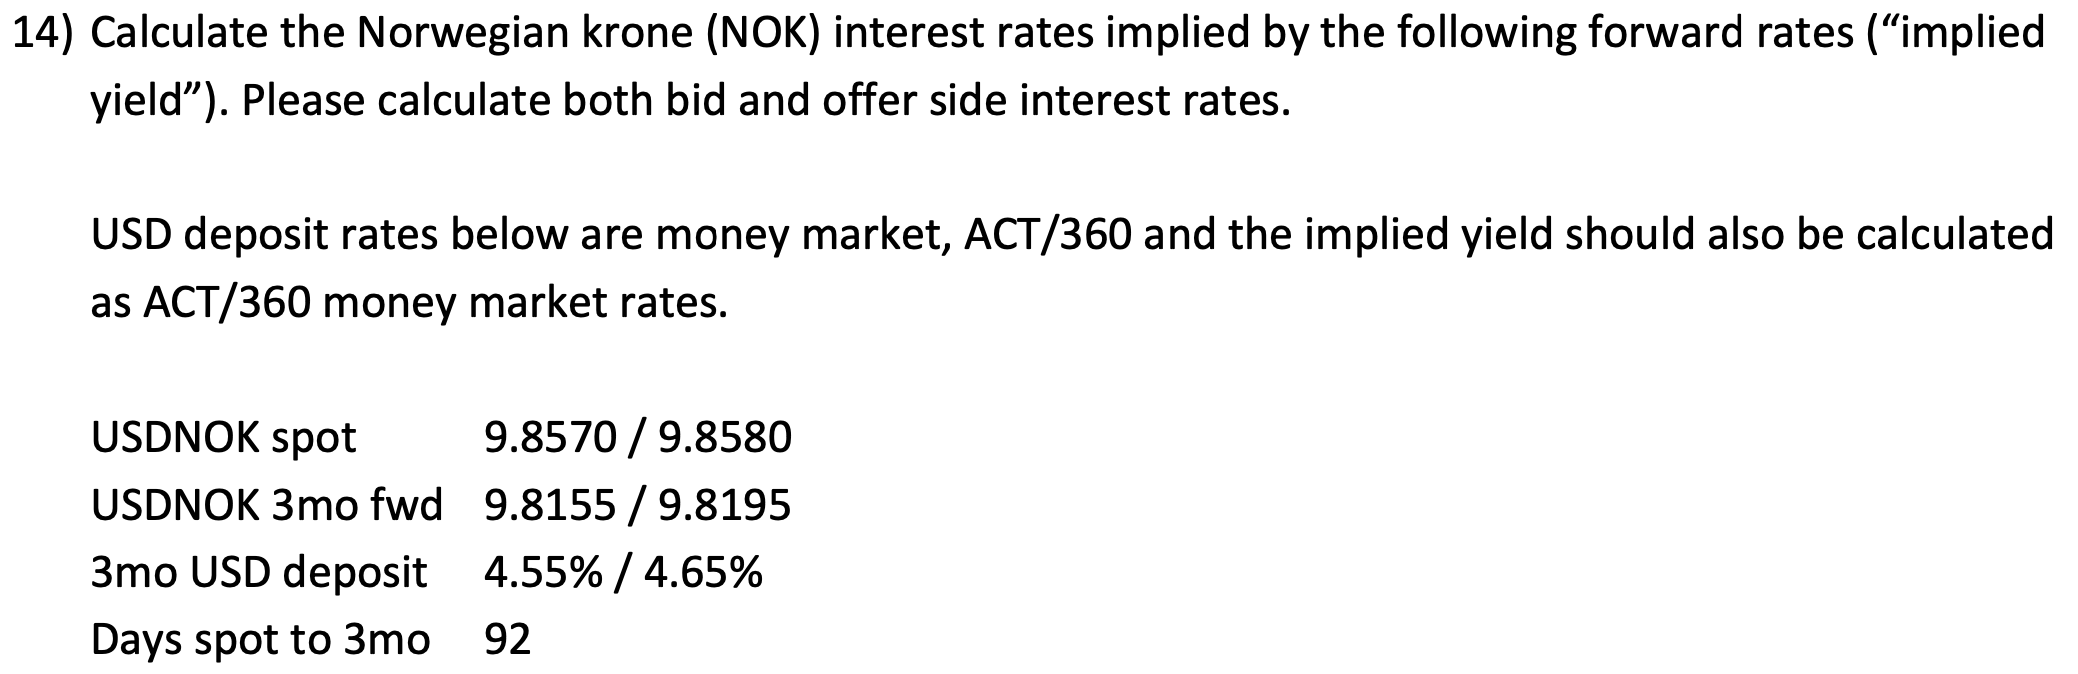

In [56]:
USDNOK_spot_bid = 9.8570
USDNOK_spot_offer = 9.8580
USDNOK_3month_bid = 9.8155
USDNOK_3month_offer = 9.8195
USD_3month_bid_rate = 0.0455
USD_3month_offer_rate = 0.0465
days_3month = 92

In [57]:
NOK_3month_bid_implied = ((USDNOK_3month_bid/USDNOK_spot_bid)*(1+USD_3month_offer_rate*days_3month/360) - 1)*360/days_3month
printmd(f'**NOK 3 month bid implied =** {NOK_3month_bid_implied:.4f}')

**NOK 3 month bid implied =** 0.0298

2.983 / 3.004

In [58]:
NOK_3month_offer_implied = ((USDNOK_3month_offer/USDNOK_spot_offer)*(1+USD_3month_bid_rate*days_3month/360) - 1)*360/days_3month
printmd(f'**NOK 3 month offer implied =** {NOK_3month_offer_implied:.4f}')

**NOK 3 month offer implied =** 0.0300

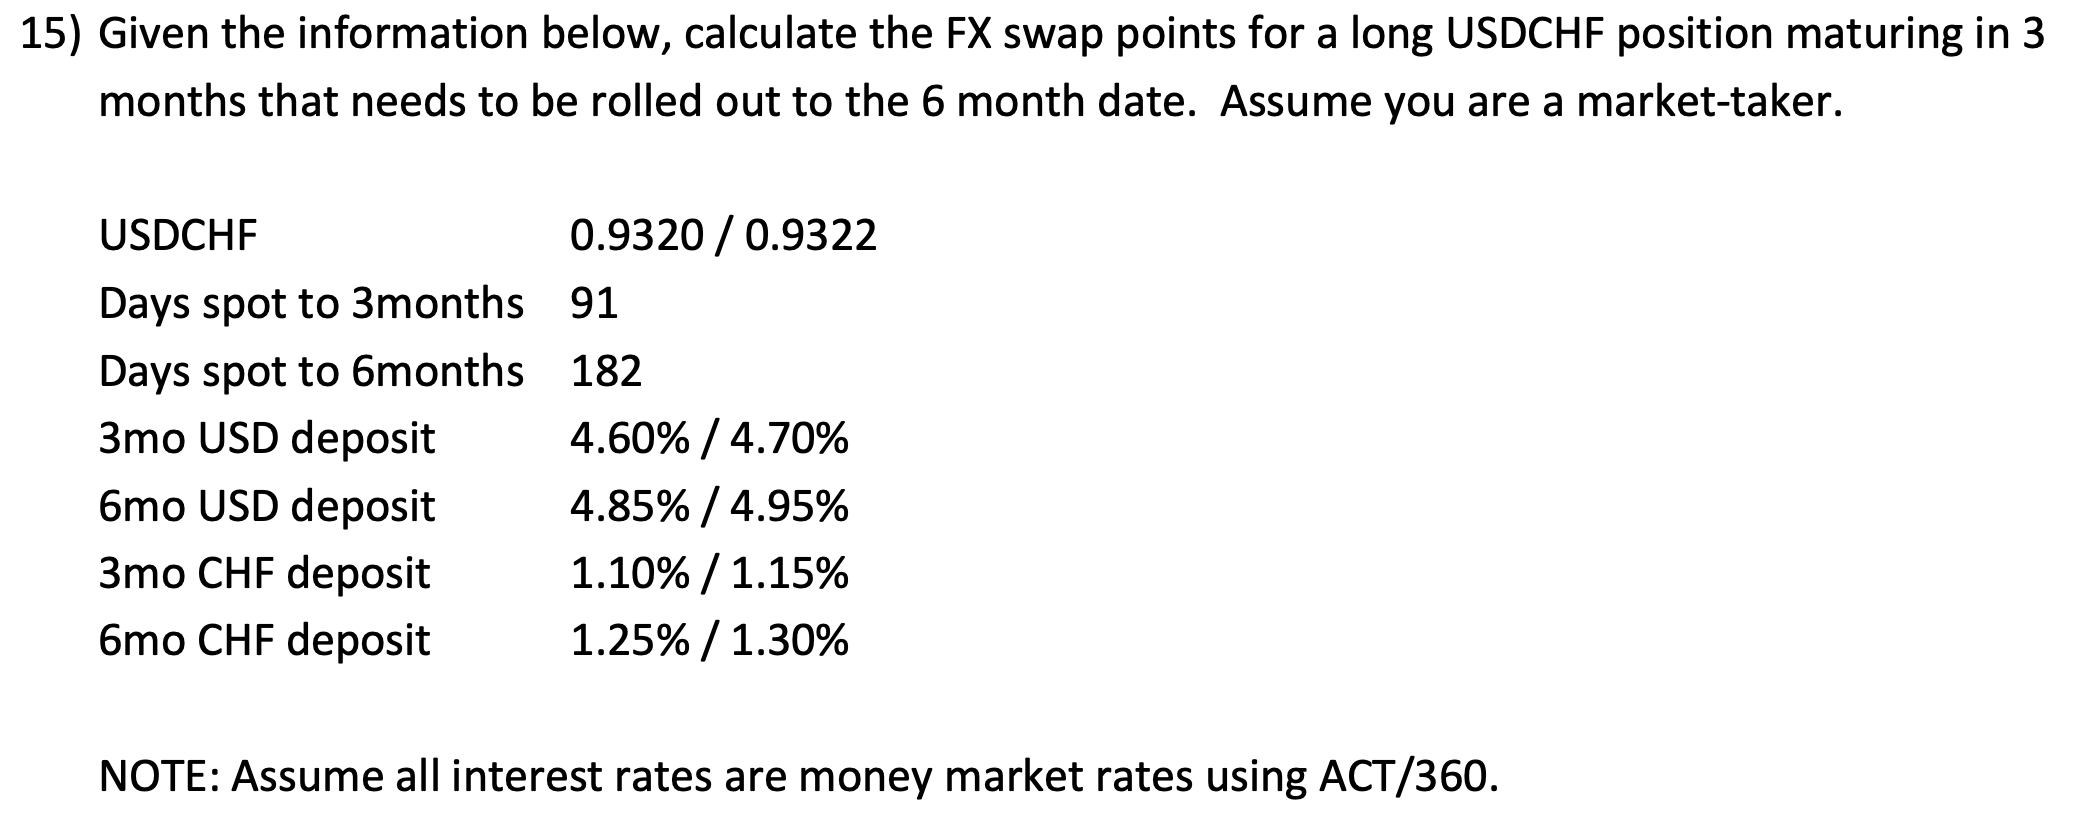

In [59]:
USDCHF_spot_bid = 0.9320
USDCHF_spot_offer = 0.9322
days_3mo = 91
days_6mo = 182
USD_3month_bid_rate = 0.046
USD_3month_offer_rate = 0.047
USD_6month_bid_rate = 0.0485
USD_6month_offer_rate = 0.0495
CHF_3month_bid_rate = 0.011
CHF_3month_offer_rate = 0.0115
CHF_6month_bid_rate = 0.0125
CHF_6month_offer_rate = 0.013

In [60]:
f_near = USDCHF_spot_bid * (1 + CHF_3month_bid_rate*days_3mo/360) / (1 + USD_3month_offer_rate*days_3mo/360)
printmd(f'The near forward rate is {f_near:.4f}')

The near forward rate is 0.9236

In [61]:
f_far = USDCHF_spot_bid * (1 + CHF_6month_bid_rate*days_6mo/360) / (1 + USD_6month_offer_rate*days_6mo/360)
printmd(f'The far forward rate is {f_far:.4f}')

The far forward rate is 0.9150

In [62]:
printmd(f'The forward swap points are {(f_far - f_near)*10000:.4f}')

The forward swap points are -86.2633

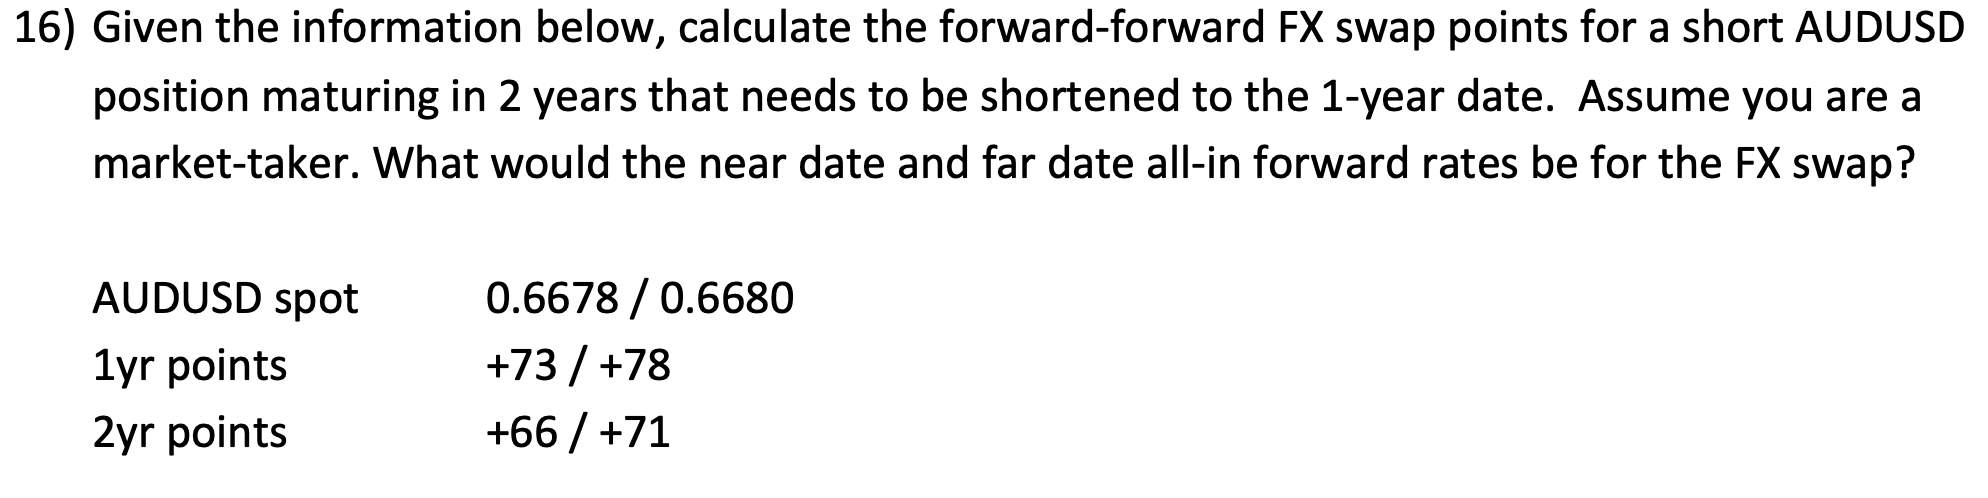

In [63]:
AUDUSD_spot_bid = 0.6678
AUDUSD_spot_offer = 0.6680
AUDUSD_1yr_fwdpt_bid = 73
AUDUSD_1yr_fwdpt_offer = 78
AUDUSD_2yr_fwdpt_bid = 66
AUDUSD_2yr_fwdpt_offer = 71

In [64]:
AUDUSD_1yr_fwd_bid = AUDUSD_spot_bid + AUDUSD_1yr_fwdpt_bid/10000
printmd(f'The 1 year forward bid is {AUDUSD_1yr_fwd_bid:.4f}')

The 1 year forward bid is 0.6751

In [65]:
AUDUSD_2yr_fwd_bid = AUDUSD_spot_bid + AUDUSD_2yr_fwdpt_bid/10000
printmd(f'The 2 year forward bid is {AUDUSD_2yr_fwd_bid:.4f}')

The 2 year forward bid is 0.6744

In [66]:
((0.6678+(73/10000)) - (0.6678+(66/10000)))*10000
FX_swap_points = ((AUDUSD_1yr_fwd_bid - AUDUSD_2yr_fwd_bid)*10000)
printmd(f'The FX swap points are {FX_swap_points:.4f}')

The FX swap points are 7.0000

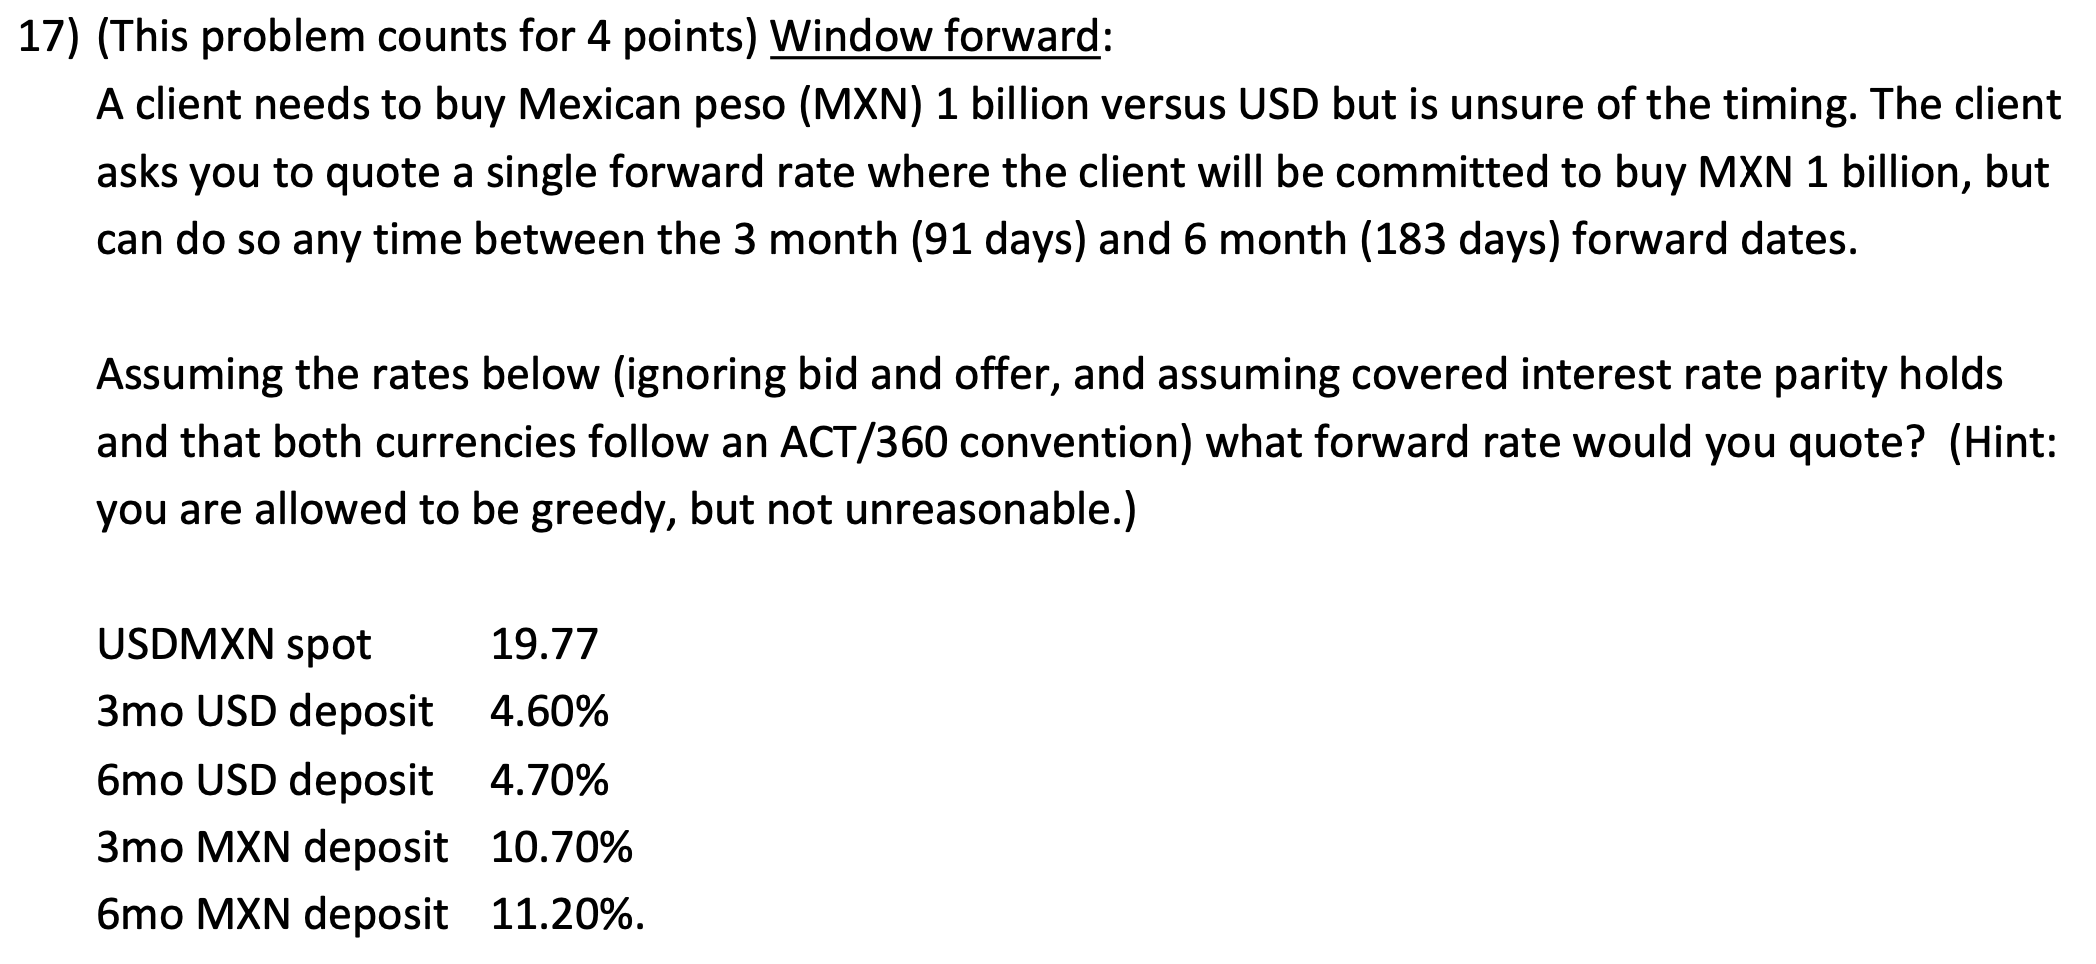

In [67]:
USDMXN_spot_bid = 19.77
USD_3month_bid_rate = 0.046
USD_6month_bid_rate = 0.047
MXN_3month_bid_rate = 0.1070
MXN_6month_bid_rate = 0.1120
days_6mo = 183

In [68]:
USDMXN_fwd_bid = USDMXN_spot_bid * (1 + MXN_6month_bid_rate*days_6mo/360) / (1 + USD_6month_bid_rate*days_6mo/360)
printmd(f'The forward bid is {USDMXN_fwd_bid:.4f}')

The forward bid is 20.4080

# 18